# Real State Analisys

Analysis of Real State Market from Project 2.

Based on the book: "Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems"

https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291

### Import Dependencies

In [1]:
# import warnings
# warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Import DB Credential, API Keys

In [3]:
# Import DB user and password
from api_keys import positionstack_key
from api_keys import opencagedata_API
from api_keys import DATABASE_URL

### Load DB libraries and Create DB Connection

In [4]:
 # Imports the method used to connect to DBs
from sqlalchemy import create_engine
from sqlalchemy import exc
from sqlalchemy import update

# Imports the methods needed to abstract python classes into database tables
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# function to establish a session with a connected database
from sqlalchemy.orm import Session

# database compliant datatypes
from sqlalchemy import Column, Integer, String, Float, ForeignKey, DateTime

# from config import db_user, dialect

<hr style="border: 3px solid red;">

### Query Data from Database

In [5]:
def query_database(db_string=DATABASE_URL, table_name="realstatelisting"):
    
    # Create database connection
    engine = create_engine(db_string)

    # Query database using pandas
    df = pd.read_sql_query(f'''select * from {table_name}''', engine)

    engine.dispose()
    
    return df

### Save data from DB to CSV

In [6]:
import os

HOUSING_PATH = os.path.join("Database")
def save_housing_data(housing_path=HOUSING_PATH):
    csv_path =  os.path.join(housing_path, "house_dataset.csv")
    
    df = query_database()

    df.to_csv(csv_path,index=False)
    
    print("Data saved to:", csv_path)

In [7]:
# Uncomment to save data a new csv file
# save_housing_data()

### Load data

In [8]:
# return a dataframe object containing all the data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path =  os.path.join(housing_path, "house_dataset.csv")
    return pd.read_csv(csv_path)

In [9]:
housing_df = load_housing_data()
housing_df.shape

(4590, 15)

In [10]:
housing_df.head(5)

,house_id,address,price,bed,bath,sqft,lot,latitude,longitude,house_link,image_1,image_2,map_link,google_map,created_date
0,1,"308 Avenue of Oaks St, Houston, TX 77009",319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://www.openstreetmap.org/?mlat=29.8113709...,https://www.google.com/maps/place/308+Avenue+o...,2021-01-10 21:13:15.025000
1,2,"7911 Napawood Ct, Houston, TX 77088",199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://www.openstreetmap.org/?mlat=29.8806332...,https://www.google.com/maps/place/7911+Napawoo...,2021-01-10 21:13:15.139000
2,3,"3110 Willow Wood Trl, Houston, TX 77345",295000.0,4.0,2.5,2616.0,10890.0,30.084300,-95.171903,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/2a51bc5fa69a691754ff5201...,https://ap.rdcpix.com/2a51bc5fa69a691754ff5201...,https://www.openstreetmap.org/?mlat=30.0842996...,https://www.google.com/maps/place/3110+Willow+...,2021-01-10 21:13:15.252000
3,4,"16118 Windom Dr, Houston, TX 77598",179000.0,2.0,2.0,1104.0,7150.0,29.551512,-95.136427,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/78ae641457dbb4740a405bd9...,https://ap.rdcpix.com/78ae641457dbb4740a405bd9...,https://www.openstreetmap.org/?mlat=29.5515117...,https://www.google.com/maps/place/16118+Windom...,2021-01-10 21:13:15.365000
4,5,"3405 Rawley St, Houston, TX 77020",309900.0,3.0,3.5,2508.0,3506.0,29.778996,-95.335636,https://www.realtor.com/realestateandhomes-det...,https://maps.googleapis.com/maps/api/streetvie...,NaN,https://www.openstreetmap.org/?mlat=29.7789963...,https://www.google.com/maps/place/3405+Rawley+...,2021-01-10 21:13:15.478000


In [11]:
housing_df.columns

Index(['house_id', 'address', 'price', 'bed', 'bath', 'sqft', 'lot',
       'latitude', 'longitude', 'house_link', 'image_1', 'image_2', 'map_link',
       'google_map', 'created_date'],
      dtype='object')

In [13]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_id      4590 non-null   int64  
 1   address       4590 non-null   object 
 2   price         4590 non-null   float64
 3   bed           4590 non-null   float64
 4   bath          4590 non-null   float64
 5   sqft          4578 non-null   float64
 6   lot           4345 non-null   float64
 7   latitude      4590 non-null   float64
 8   longitude     4590 non-null   float64
 9   house_link    4590 non-null   object 
 10  image_1       2738 non-null   object 
 11  image_2       2405 non-null   object 
 12  map_link      4590 non-null   object 
 13  google_map    4590 non-null   object 
 14  created_date  4590 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 538.0+ KB


#### Create a Zip Code from Address

In [24]:
housing_df["Zip Code"] = housing_df["address"].str.split("TX", n = 1, expand = True)[1].astype(int)

In [25]:
# extract month from datetime pandas

# pd.DataFrame(pd.DatetimeIndex(housing["created_date"]).to_period('M'))
# pd.DataFrame(pd.DatetimeIndex(housing["created_date"]).month)

#### Create a copy of the dataset

In [26]:
housing = housing_df.drop(["address","house_link","image_1","image_2","map_link","google_map","created_date"], axis=1).copy()
housing.head()

,house_id,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
0,1,319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,77009
1,2,199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,77088
2,3,295000.0,4.0,2.5,2616.0,10890.0,30.084300,-95.171903,77345
3,4,179000.0,2.0,2.0,1104.0,7150.0,29.551512,-95.136427,77598
4,5,309900.0,3.0,3.5,2508.0,3506.0,29.778996,-95.335636,77020


### Plot data

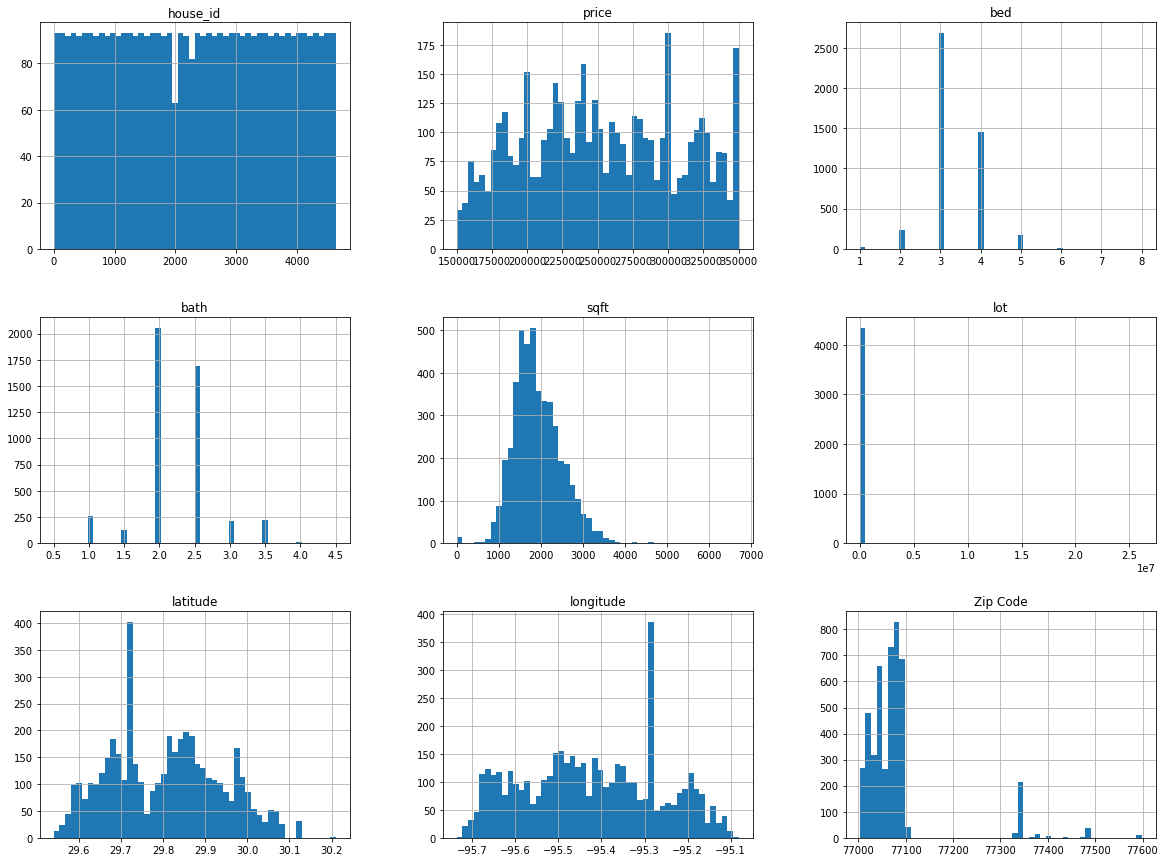

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

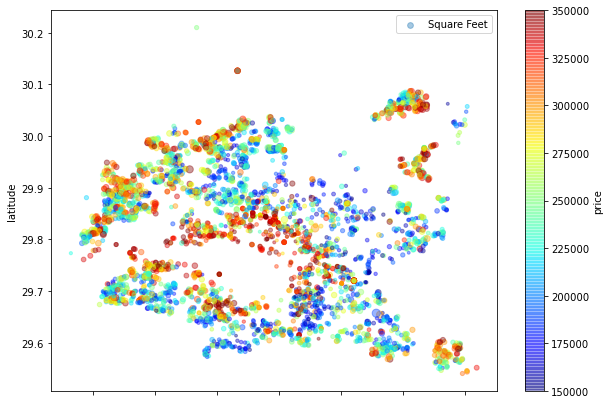

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=.4,
            s=housing["sqft"]/100, label="Square Feet", figsize=(10,7),
            c="price", cmap=plt.get_cmap("jet"), colorbar=True
            )

plt.legend()